# **Project 1: Sentiment Analysis from Audio Recordings**

##**Team Members:**

1. Muhammad Ammar Ibrahim [23110345]
2. Abdullah Naveed [23100239]
3. Muhammad Hassan [23100199]

---
##**Motivation**

Sentiment analysis from audio recordings is the process of using natural language processing techniques to analyze the emotional tone of spoken language in audio files. This can be done using machine learning algorithms that identify patterns and features in the audio, such as intonation, pitch, and tempo, to infer the underlying sentiment of the speaker. Sentiment analysis from audio recordings has a wide range of applications, including in
customer service, where it can be used to monitor customer sentiment and satisfaction during phone calls, and in social media monitoring, where it can help to identify trends and sentiment around specific topics. It can also be used in the entertainment industry, where sentiment analysis can help to gauge audience reactions to films, TV shows, and other forms of media.

##**Project Overview**

In this project, you will work on the development of a classifier to identify the emotion/sentiment for each recorded audio. You will first remove noise from the audio files and then extract the features of the given audio signal and use these features for classification.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5886 sha256=ca582e333d8b738a51ec4b09e53031e029b4e16f93a674a95971700b84780feb
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [5]:
###################################################################> Libraries
import glob
import librosa
import numpy as np
import scipy.signal
import pandas as pd
import scipy.io.wavfile
import matplotlib.pyplot as plt
from sklearn import preprocessing
import python_speech_features as psf
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import LabelEncoder
import soundfile # to read audio file

---

# **============================================> Loading Data**

---

## **===> Drive Paths**

In [2]:
path_SentenceFilenames = '/content/drive/MyDrive/Colab Notebooks/data/SentenceFilenames.csv'
path_audio = 'data/NoiseAudioWAV/**'

##**Data Set Description**
CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). The actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral and Sad) and four different emotion levels (Low, Medium, High and Unspecified).

## **===> List of movie files used in study**

In [6]:
###################################################################> Loading CSVs 
df_SentenceFilenames = pd.read_csv(path_SentenceFilenames)
df_SentenceFilenames.head(5)

,Stimulus_Number,Filename
0,1,1001_IEO_NEU_XX
1,2,1001_IEO_HAP_LO
2,3,1001_IEO_HAP_MD
3,4,1001_IEO_HAP_HI
4,5,1001_IEO_SAD_LO


---
## **===> Filename (.wav) labeling conventions**

**1.** **The Actor id is a 4 digit number at the start of the file. Each subsequent identifier is separated by an underscore (_).**

**2.** **Actors spoke from a selection of 12 sentences (in parentheses is the three letter acronym used in the second part of the filename):**

* It's eleven o'clock (IEO).
* That is exactly what happened (TIE).
* I'm on my way to the meeting (IOM).
* I wonder what this is about (IWW).
* The airplane is almost full (TAI).
* Maybe tomorrow it will be cold (MTI).
* I would like a new alarm clock (IWL)
* I think I have a doctor's appointment (ITH).
* Don't forget a jacket (DFA).
* I think I've seen this before (ITS).
* The surface is slick (TSI).
* We'll stop in a couple of minutes (WSI).

**3.** **The sentences were presented using different emotion (in parentheses is the three letter code used in the third part of the filename):**

* Anger (ANG)
* Disgust (DIS)
* Fear (FEA)
* Happy/Joy (HAP)
* Neutral (NEU)
* Sad (SAD)

**and emotion level (in parentheses is the two letter code used in the fourth part of the filename):**

* Low (LO)
* Medium (MD)
* High (HI)
* Unspecified (XX)
---


## **===> Loading Audio files + Noice Removal**

### **==> loading one audio and removing noice**

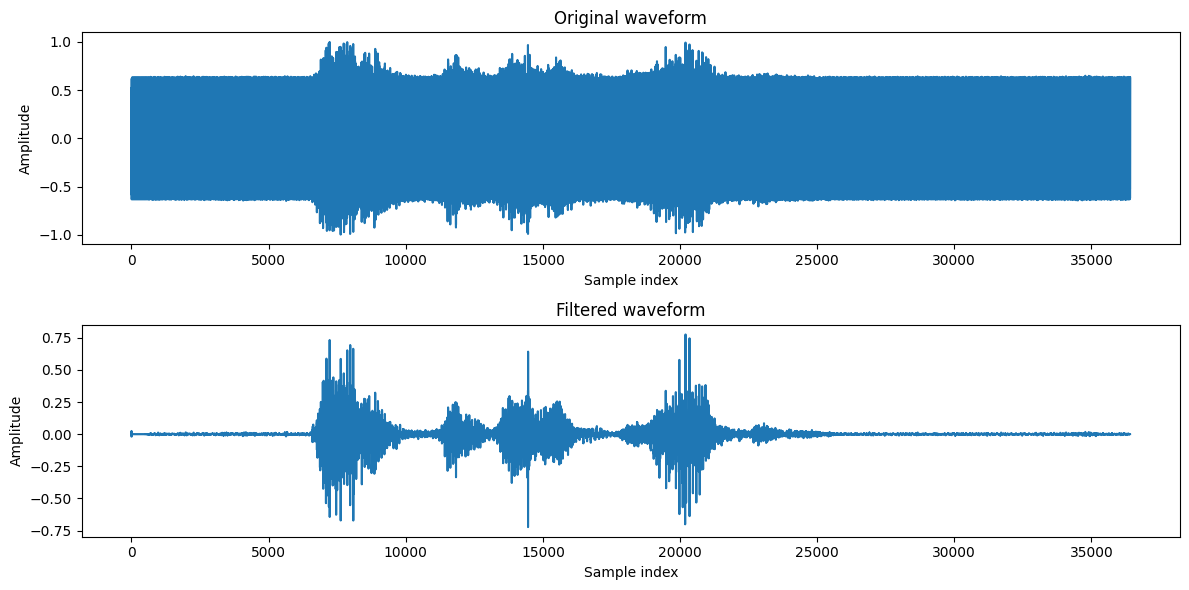

In [8]:
#######################################################> cutoff
cutoff = 5000  # Hz

signal, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/data/NoiseAudioWAV/1001_DFA_ANG_XX.wav', sr=None)
#######################################################> Noice Removal
nyquist_rate = sr / 2
cutoff_norm = cutoff / nyquist_rate
b, a = scipy.signal.butter(4, cutoff_norm, btype='lowpass')
y_filtered_one = scipy.signal.lfilter(b, a, signal)

#######################################################> Plot original and filtered waveforms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original waveform')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(y_filtered_one)
plt.title('Filtered waveform')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


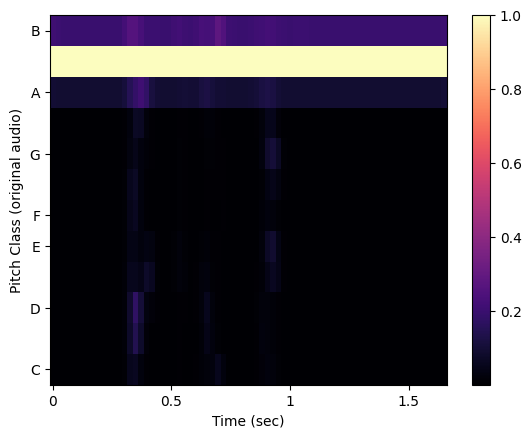

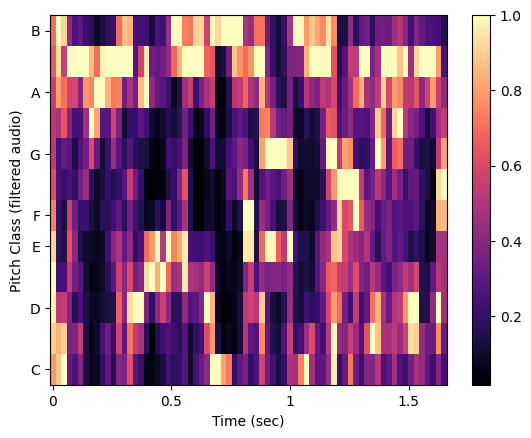

In [10]:
# Load audio file
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/data/NoiseAudioWAV/1001_DFA_ANG_XX.wav', sr=None)

chroma0 = librosa.feature.chroma_stft(y=y, sr=sr)
chroma1 = librosa.feature.chroma_stft(y=y_filtered_one, sr=sr)

# Plot chromagram
librosa.display.specshow(chroma0, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Class (original audio)')
plt.show()
librosa.display.specshow(chroma1, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.xlabel('Time (sec)')
plt.ylabel('Pitch Class (filtered audio)')
plt.show()

In [ ]:
# Save filtered audio as WAV file
scipy.io.wavfile.write('/content/drive/MyDrive/Colab Notebooks/filtered_audio.wav', sr,y_filtered_one)

## **===> Loading + Filtering + Feature Extraction**

Before processing the audio files, you are required to select audio files from the dataset. You must create **training, validation and testing sets** that are best suited to train and evaluate your classifier(s). Then **remove the noise** from the selected audio files **using low pass filtering**. We require you to **review the literature** and identify a list of features that can be used
for synthetic speech attribution. For your convenience, we have listed below the features that can be potentially used for the problem under consideration.

1. **Fourier transform**
2. **Mel frequency cepstral coefficients (MFCCs):** Features that describe the overall shape of a spectral envelope of the signal.
3. **Melspectrogram :** A spectrogram where the signal frequencies are converted to Mel scale.
4. **Chromagram:** Also known as chroma features, this is a representation for audio or speech signal in which the entire signal spectrum is projected onto 12 bins known as pitch classes.
5. **Bicoherence:** Mean, variance, skewness and kutrosis of magnitude and phase of
bicoherence.
6. **Spectral centroid:** Location of center of mass of the spectrum.
7. **Spectral bandwidth:** Difference between the highest and the lowest frequency in the spectrum.
8. **Spectral contrast:** The decibel difference between peaks and valleys in the spectrum.

In [11]:
# Use this code to extract MFCC features from audio file
def get_MFCC(audio, sr, numFeatures):
    features = psf.mfcc(audio, sr, 0.025, 0.01, numFeatures, appendEnergy = True)
    return np.mean(features, axis=0)

In [14]:
def filter(X,sr,cutoff):
    nyquist_rate = sr / 2
    cutoff_norm = cutoff / nyquist_rate
    b, a = scipy.signal.butter(4, cutoff_norm, btype='lowpass', analog=False)
    # return scipy.signal.lfilter(b, a, X)
    return scipy.signal.filtfilt(b, a, X)

def extract_feature(file_name, cutoff=5000, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    spec_centroid = kwargs.get("spec_centroid")
    spec_contrast = kwargs.get("spec_contrast")
    spec_bandwidth = kwargs.get("spec_bandwidth")
    spec_rolloff = kwargs.get("spec_rolloff")
    spec_flatness = kwargs.get("spec_flatness")

    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        X = filter(X, sample_rate, cutoff)
        result = np.array([])

        if mfcc:
            mfccs = get_MFCC(X, sample_rate, 200)
            # mfccs = np.mean(librosa.feature.mfcc(
                # y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))

        if chroma:
            chroma_stft = np.mean(librosa.feature.chroma_stft(
                y=X, sr=sample_rate, n_chroma=225).T, axis=0)
            result = np.hstack((result, chroma_stft))

        if mel:
            mel = np.mean(librosa.feature.melspectrogram(
                y=X, sr=sample_rate, n_mels=225).T, axis=0)
            result = np.hstack((result, mel))

        if spec_centroid:
            spec_centroid = np.mean(librosa.feature.spectral_centroid(
                y=X, sr=sample_rate, n_fft=2048).T, axis=0)
            result = np.hstack((result, spec_centroid))

        if spec_contrast:
            spec_contrast = np.mean(librosa.feature.spectral_contrast(
                y=X, sr=sample_rate, n_fft=2048).T, axis=0)
            result = np.hstack((result, spec_contrast))

        if spec_bandwidth:
            spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(
                y=X, sr=sample_rate, n_fft=2048).T, axis=0)
            result = np.hstack((result, spec_bandwidth))

        if spec_rolloff:
            spec_rolloff = np.mean(librosa.feature.spectral_rolloff(
                y=X, sr=sample_rate, n_fft=2048).T, axis=0)
            result = np.hstack((result, spec_rolloff))

        if spec_flatness:
            spec_flatness = np.mean(librosa.feature.spectral_flatness(
                y=X, n_fft=2048).T, axis=0)
            result = np.hstack((result, spec_flatness))

    return result

def load_data():
    X, y = [], []
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/data/NoiseAudioWAV/*.wav"):
        features = extract_feature(
            file, mfcc=True, chroma=True, mel=True, spec_centroid=True, spec_contrast=True, spec_bandwidth=True, spec_rolloff=True, spec_flatness=True)
        X.append(features)
        label = file.split("_")[2]
        y.append(label)
    return X, y

X , y = load_data()

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


## **===> Dimensionality Reduction (optional)**

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA feature reduction

#=====================================================> Standardize
# scaler = preprocessing.StandardScaler().fit(X) # standardize the data
# X = scaler.transform(X)

#=====================================================> Normalize
X_normal = preprocessing.normalize(X) # normalize the data

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_normal, y)


## **===> Train-Test Split**

In [23]:
#=====================================================>
X_lda = np.array(X_lda)
print(X_lda.shape)

(7442, 5)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X_lda), y, test_size=0.25, random_state=7)

In [25]:
print(len(X_train[0]))

5


---
# **===> Training Models**
---

##**Classifiers**
Followed by feature extraction, we require you to evaluate the performance of following:
1.   K-Nearest Neighbors
2.   Logistic Regression
3.   Naive Bayes
4.   Support Vector Machines
5.   Neural Network

You are allowed to use Scikit-learn implementations of the algorithms.

---

In [26]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# =======================================================> Instantiate the classifiers
knn = KNeighborsClassifier(n_neighbors=20, p=1)
lr = LogisticRegression()
nb = GaussianNB()
svm = SVC()
nn = MLPClassifier(max_iter=500)

# =======================================================> Train and predict using each classifier
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

nn.fit(X_train, y_train)
nn_preds = nn.predict(X_test)


---
# **===> Evaluation**
---

In [27]:
from sklearn.metrics import accuracy_score, f1_score

#=======================================================> accuracy_score
knn_acc = accuracy_score(y_test, knn_preds)
lr_acc = accuracy_score(y_test, lr_preds)
nb_acc = accuracy_score(y_test, nb_preds)
svm_acc = accuracy_score(y_test, svm_preds)
nn_acc = accuracy_score(y_test, nn_preds)

#=======================================================> f1_score
knn_f1 = f1_score(y_test, knn_preds, average='micro')
lr_f1 = f1_score(y_test, lr_preds, average='micro')
nb_f1 = f1_score(y_test, nb_preds, average='micro')
svm_f1 = f1_score(y_test, svm_preds, average='micro')
nn_f1 = f1_score(y_test, nn_preds, average='micro')

#=======================================================> Printing the results
print("Accuracy Scores:")
print("K-Nearest Neighbors:", knn_acc)
print("Logistic Regression:", lr_acc)
print("Naive Bayes:", nb_acc)
print("Support Vector Machines:", svm_acc)
print("Neural Network:", nn_acc)

print("\nF1 Scores:")
print("K-Nearest Neighbors:", knn_f1)
print("Logistic Regression:", lr_f1)
print("Naive Bayes:", nb_f1)
print("Support Vector Machines:", svm_f1)
print("Neural Network:", nn_f1)

Accuracy Scores:
K-Nearest Neighbors: 0.5416442772702847
Logistic Regression: 0.5566899516389038
Naive Bayes: 0.5298226759806556
Support Vector Machines: 0.555077915099409
Neural Network: 0.553465878559914

F1 Scores:
K-Nearest Neighbors: 0.5416442772702847
Logistic Regression: 0.5566899516389038
Naive Bayes: 0.5298226759806556
Support Vector Machines: 0.555077915099409
Neural Network: 0.553465878559914


---
# **===> Visualization**
---

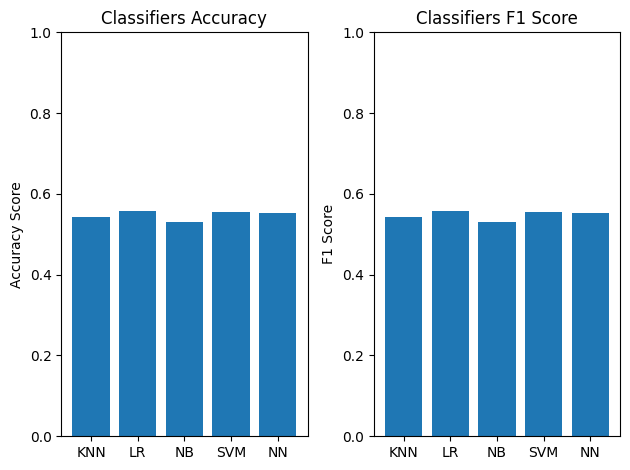

In [28]:
# =======================================================> Create bar plots to visualize the results
acc_scores = [knn_acc, lr_acc, nb_acc, svm_acc, nn_acc]
f1_scores = [knn_f1, lr_f1, nb_f1, svm_f1, nn_f1]

plt.subplot(1, 2, 1)
plt.bar(['KNN', 'LR', 'NB', 'SVM', 'NN'], acc_scores)
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Classifiers Accuracy')

plt.subplot(1, 2, 2)
plt.bar(['KNN', 'LR', 'NB', 'SVM', 'NN'], f1_scores)
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('Classifiers F1 Score')

plt.tight_layout()
plt.show()